###Dataset Load

In [1]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d mlg-ulb/creditcardfraud

 70% 46.0M/66.0M [00:00<00:00, 137MB/s]
100% 66.0M/66.0M [00:00<00:00, 166MB/s]


In [2]:
# # extracting the compressed Dataset
# from zipfile import ZipFile
# zipdata = '/content/creditcardfraud.zip'
# with ZipFile(zipdata, 'r') as zip:
#   zip.extractall()
#   print('The dataset is extracted')

The dataset is extracted


###Initial things

In [3]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing


from sklearn import svm
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


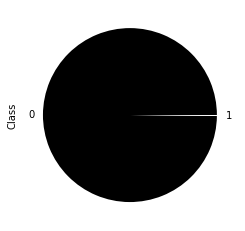

In [5]:
# showing that this dataset is totally unbalanced
count_classes = pd.value_counts(dataset['Class'])
count_classes.plot.pie(colors = ['black', 'white'])

In [6]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

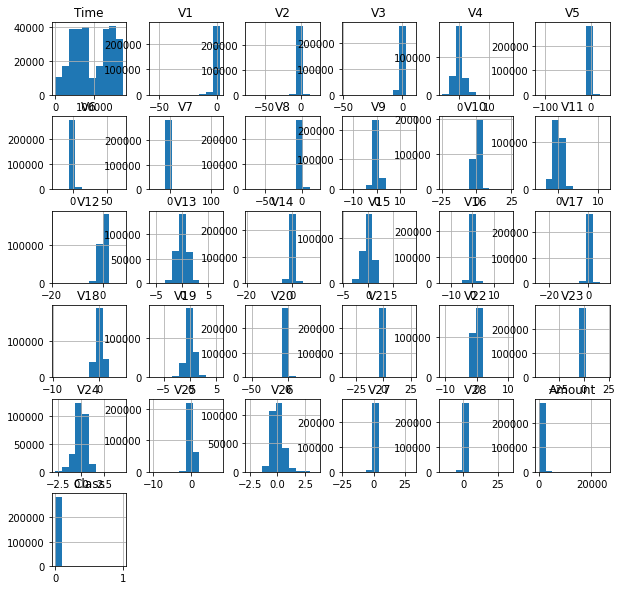

In [8]:
dataset.hist(figsize=(10, 10));

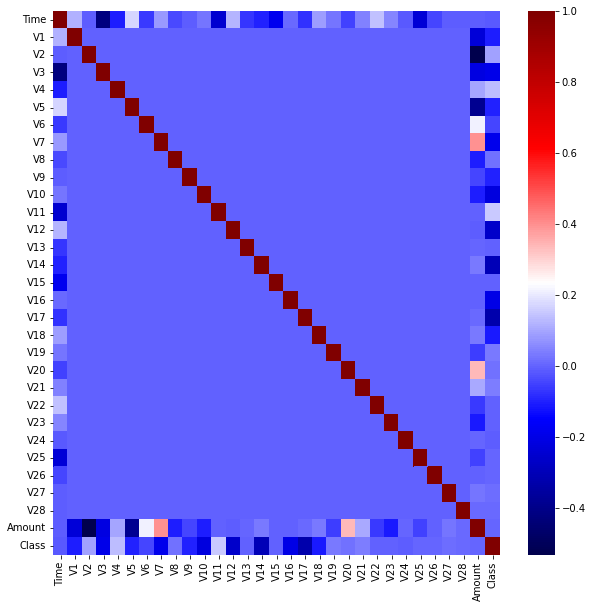

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show();

In [10]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [11]:
scores = []

In [12]:
names = ["LR", "RF", "XGBoost", "Ada Boost", "SGD", "NN(Supervised)", "DT", "GNB", "GB", "KNN", "VC", "SVM"]

In [13]:
preci = []
recall = []
f1 = []

### **Logistic** **Regression**

In [14]:
legit_sample = legit.sample(n = 492, random_state=30)
print("Legit ", legit_sample.shape)

new_dataset = pd.concat([legit_sample, fraud], axis=0)

X = np.asarray(new_dataset.drop(columns='Class', axis = 1))
y = np.asarray(new_dataset['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=30)

Legit  (492, 31)


In [15]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [16]:
X_df = pd.DataFrame(X_train)
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.936742,0.814721,-0.389101,0.148728,-0.441363,0.543372,-0.176469,0.536085,-0.131887,0.813257,0.381358,-1.018194,0.704603,0.737048,0.112448,-0.386174,0.727379,0.851488,0.781251,-0.245462,-0.239451,-0.165537,0.201525,-0.092078,-1.376658,0.476268,1.525455,-0.143026,-0.141534,-0.316790
1,1.451336,0.779729,-0.129670,0.170847,0.646845,0.675520,-0.083869,0.610842,-0.097459,-0.132815,0.686827,-0.169856,0.623185,-0.644957,0.132112,-1.695331,1.041974,0.887925,0.961751,-1.441655,-0.393026,-0.200745,-0.300237,0.063919,-0.358981,0.242826,-0.066048,-0.136511,-0.087342,-0.335145
2,-1.023508,-1.140196,-3.320488,0.827674,-0.340431,1.744801,-1.556063,-0.327953,-0.073191,0.867490,0.916221,-0.168000,0.816441,-0.049339,0.506072,-0.455015,0.845938,0.655661,-0.448920,0.157213,-2.522424,-0.438301,0.118697,-1.405318,0.230797,0.043590,-0.497742,1.035498,0.498845,1.570480
3,0.017035,0.789943,-0.580992,0.395415,-0.622677,0.252823,0.134801,0.371349,-0.026395,1.108357,0.514133,-0.437057,0.665552,-1.671055,0.576168,0.444021,0.848663,0.596657,0.884104,-0.094182,-0.416979,-0.232195,-0.572048,0.296529,-0.937089,-0.831116,-0.623877,-0.099080,-0.159517,-0.289903
4,-1.074920,0.636080,-0.373743,0.679471,0.110775,0.359142,0.705005,0.463187,-0.018681,0.231824,0.774437,-0.292879,0.962959,0.395311,0.747283,-1.170537,0.600901,0.516799,0.161026,-0.759262,-0.334756,-0.203394,-0.251559,0.072108,0.080460,0.538696,-0.280244,-0.085995,-0.074485,-0.354515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,-0.342156,0.676740,-0.793695,0.605027,-1.402351,0.033074,0.165094,0.309684,-0.051370,0.707664,0.605052,-0.466850,0.793391,-0.018100,0.780649,1.426649,0.228885,0.462186,1.437771,-0.002991,-0.532510,-0.263342,-0.441164,-0.003905,-0.571298,0.312907,-0.170857,-0.065760,-0.047154,-0.164036
783,-0.744451,0.617834,-0.769474,0.561595,-0.830918,0.076765,-0.094044,0.457369,-0.106506,-0.018334,0.804445,-0.191191,0.826487,0.332924,0.825039,0.204002,0.231442,0.521951,1.021607,-0.722332,-0.254082,-0.220338,-0.484720,-0.060068,1.057826,0.212548,1.984255,-0.219151,-0.027885,0.334187
784,1.424827,0.152784,-1.421890,-0.485676,0.338051,-0.015241,-0.310404,0.535589,-0.073920,0.204819,-0.382517,0.385550,-0.165649,-1.918307,-0.604665,-0.603716,0.118918,0.194657,0.623731,-0.183135,2.877122,0.289627,-0.831316,-1.145120,-1.019249,-0.261134,0.766274,0.053805,1.054342,4.901862
785,-0.153960,0.671895,-0.728552,0.717224,-0.822555,-0.031264,0.118204,0.288620,-0.061190,0.502353,0.740988,-0.936041,0.548794,0.038701,0.595975,0.458858,0.928769,0.611535,0.037989,0.101592,-0.045016,-0.025280,0.820864,-0.079081,0.829241,0.622252,-0.164266,-0.065323,-0.022600,-0.185014


In [17]:
import time

start_time = time.clock()
lr_clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print(time.clock() - start_time, "seconds")


0.048855999999997124 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [18]:
# accuracy on testing data
y_test_pred = lr_clf.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9593908629441624


In [19]:
print(confusion_matrix(y_test, y_test_pred))

[[96  2]
 [ 6 93]]


In [20]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

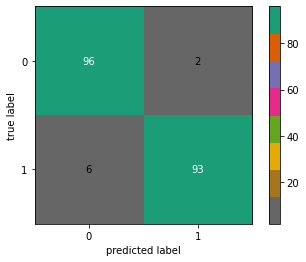

In [21]:
lr_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [22]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        98
           1       0.98      0.94      0.96        99

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Random Forest

In [24]:
rf_clf = RandomForestClassifier(n_estimators=300)
rf_clf.fit(X_train, y_train)

y_test_pred = np.array(rf_clf.predict(X_test))

In [25]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9593908629441624


In [26]:
print(confusion_matrix(y_test, y_test_pred))

[[96  2]
 [ 6 93]]


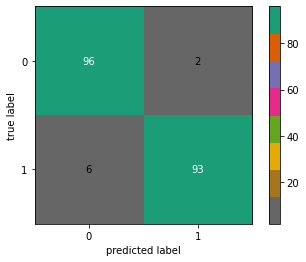

In [27]:
rf_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=rf_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        98
           1       0.98      0.94      0.96        99

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [29]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Extreme Gradient Boosting (XGBoost)

In [30]:
xgb_clf = XGBClassifier(n_estimators=300)
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_test_pred = xgb_clf.predict(X_test)

In [31]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9644670050761421


In [32]:
print(confusion_matrix(y_test, y_test_pred))

[[96  2]
 [ 5 94]]


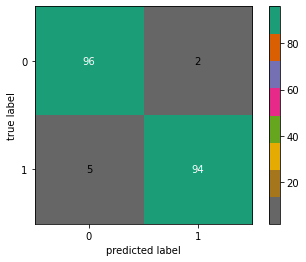

In [33]:
xgb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=xgb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.98      0.95      0.96        99

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [35]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Ada Boost

In [36]:
from sklearn import ensemble
# Creating classifier Object
adaboost_clf = ensemble.AdaBoostClassifier(n_estimators=300).fit(X_train, y_train)

In [37]:
y_test_pred = adaboost_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.934010152284264


In [38]:
print(confusion_matrix(y_test, y_test_pred))

[[89  9]
 [ 4 95]]


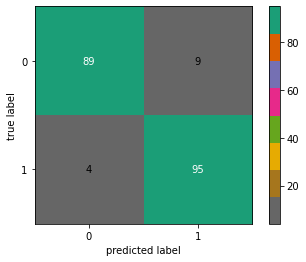

In [39]:
ab_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=ab_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        98
           1       0.91      0.96      0.94        99

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [41]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Stochastic gradient descent

In [42]:
from sklearn.linear_model import SGDClassifier

In [43]:
sgd_clf = SGDClassifier(loss="log", penalty="l2", max_iter=3000000).fit(X_train, y_train)

In [44]:
y_test_pred = sgd_clf.predict(X_test)

In [45]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.949238578680203


In [46]:
print(confusion_matrix(y_test, y_test_pred))

[[94  4]
 [ 6 93]]


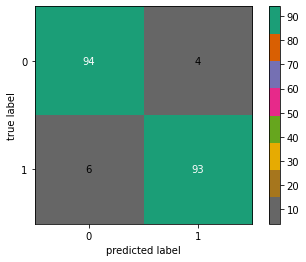

In [47]:
sgd_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=sgd_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [48]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        98
           1       0.96      0.94      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [49]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Neural network models (supervised)

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=30)

In [52]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [53]:
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (50,5), random_state = 1, max_iter=5000)
nn_clf = nn_clf.fit(X_train_norm, y_train)

In [54]:
y_test_pred = nn_clf.predict(X_test_norm)

In [55]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9441624365482234


In [56]:
print(confusion_matrix(y_test, y_test_pred))

[[92  6]
 [ 5 94]]


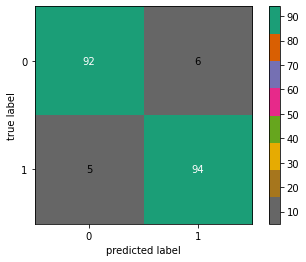

In [57]:
nn_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=nn_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [58]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        98
           1       0.94      0.95      0.94        99

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [59]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [62]:
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_split= 3, min_samples_leaf = 1, random_state=30)
dt_clf = dt_clf.fit(X_train, y_train)

In [63]:
y_test_pred = dt_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9593908629441624


In [64]:
print(confusion_matrix(y_test, y_test_pred))

[[96  2]
 [ 6 93]]


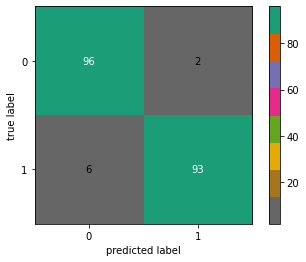

In [65]:
dt_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=dt_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [66]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        98
           1       0.98      0.94      0.96        99

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [67]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Gaussian Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gnb_clf = GaussianNB().fit(X_train, y_train)

In [70]:
y_test_pred = gnb_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.949238578680203


In [71]:
print(confusion_matrix(y_test, y_test_pred))

[[97  1]
 [ 9 90]]


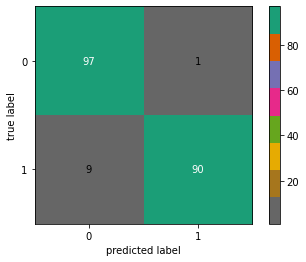

In [72]:
gnb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=gnb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [73]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.99      0.91      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [74]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf = gb_clf.fit(X_train, y_train)

In [77]:
y_test_pred = gb_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.934010152284264


In [78]:
print(confusion_matrix(y_test, y_test_pred))

[[90  8]
 [ 5 94]]


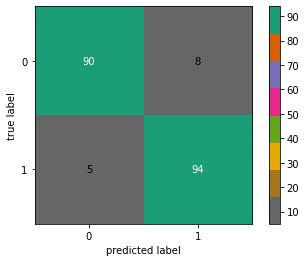

In [79]:
gb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=gb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [80]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        98
           1       0.92      0.95      0.94        99

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [81]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

### K-Nearest Neighbors(KNN)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf = knn_clf.fit(X_train_norm, y_train)

In [84]:
y_test_pred = knn_clf.predict(X_test_norm)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.949238578680203


In [85]:
print(confusion_matrix(y_test, y_test_pred))

[[97  1]
 [ 9 90]]


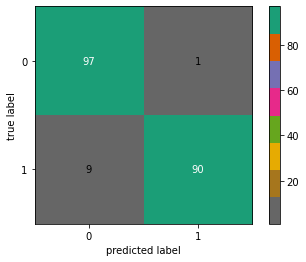

In [86]:
knn_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=knn_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [87]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.99      0.91      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [88]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

In [89]:
from sklearn.metrics import precision_recall_fscore_support

###Voting Classifier

In [90]:
from sklearn.ensemble import VotingClassifier

In [91]:
labels = ["Multi-layer Perceptron", "XGBoost", "Random Forest"]

In [92]:
#scores = scores[:-1]

In [93]:
from sklearn.ensemble import VotingClassifier

In [94]:
voting_clf = VotingClassifier (estimators = [('nn', nn_clf),('xgboost', xgb_clf), ('RF', rf_clf) ],
voting='soft')
    
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('nn',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(50, 5),
                                            max_iter=5000, random_state=1,
                                            solver='lbfgs')),
                             ('xgboost', XGBClassifier(n_estimators=300)),
                             ('RF', RandomForestClassifier(n_estimators=300))],
                 voting='soft')

In [95]:
y_test_pred = voting_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9695431472081218


In [96]:
print(confusion_matrix(y_test, y_test_pred))

[[96  2]
 [ 4 95]]


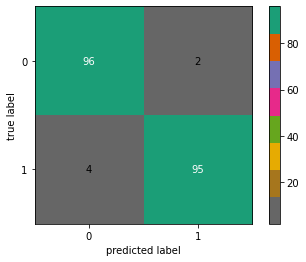

In [97]:
voting_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=voting_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [98]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        98
           1       0.98      0.96      0.97        99

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



In [99]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Support vector machine(SVM)

In [100]:
from sklearn.svm import LinearSVC

In [101]:
svm_clf = svm.SVC(kernel='linear', gamma = 'auto', C = 2, probability=True).fit(X_train, y_train)

In [102]:
y_test_pred = svm_clf.predict(X_test)

In [103]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9543147208121827


In [104]:
print(confusion_matrix(y_test, y_test_pred))

[[95  3]
 [ 6 93]]


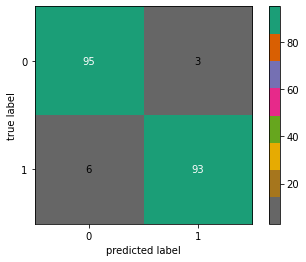

In [105]:
rf_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=rf_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [106]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        98
           1       0.97      0.94      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [107]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

### Result

In [108]:
scores = [round(x*100, 2)  for x in scores]
preci = [round(x*100, 2)  for x in preci]
recall = [round(x*100, 2)  for x in recall]
f1 = [round(x*100, 2)  for x in f1]

In [109]:
df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
cm = sns.light_palette("purple", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Classifier Name,Accuracy Score
0,LR,95.940000
1,RF,95.940000
2,XGBoost,96.450000
3,Ada Boost,93.400000
4,SGD,94.920000
5,NN(Supervised),94.420000
6,DT,95.940000
7,GNB,94.920000
8,GB,93.400000
9,KNN,94.920000


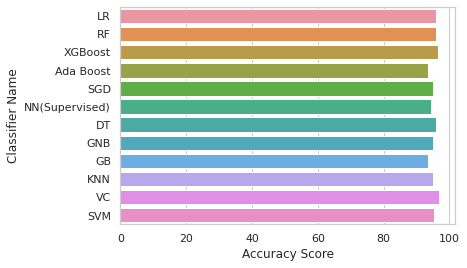

In [110]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data = df)

###ROC Curve

In [111]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_clf.predict_proba(X_test)
rf_probs = rf_clf.predict_proba(X_test)
xgb_probs = xgb_clf.predict_proba(X_test)
svm_probs = svm_clf.predict_proba(X_test)
adaboost_probs = adaboost_clf.predict_proba(X_test)
sgd_probs = sgd_clf.predict_proba(X_test)
nn_probs = nn_clf.predict_proba(X_test)
dt_probs = dt_clf.predict_proba(X_test)
gnb_probs = gnb_clf.predict_proba(X_test)
gb_probs = gb_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
voting_probs = voting_clf.predict_proba(X_test)

In [112]:
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
svm_probs = svm_probs[:, 1]
adaboost_probs = adaboost_probs[:, 1]
sgd_probs = sgd_probs[:, 1]
nn_probs = nn_probs[:, 1]
dt_probs = dt_probs[:, 1]
gnb_probs = gnb_probs[:, 1]
gb_probs = gb_probs[:, 1]
knn_probs = knn_probs[:, 1]
voting_probs = voting_probs[:, 1]

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score

In [114]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)
sgd_auc = roc_auc_score(y_test, sgd_probs)
nn_auc = roc_auc_score(y_test, nn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
voting_auc = roc_auc_score(y_test, voting_probs)


In [115]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (gnb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.990
Naive Bayes: AUROC = 0.978


In [116]:
type(lr_probs)

numpy.ndarray

In [117]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
voting_fpr, voting_tpr, _ = roc_curve(y_test, voting_probs)

In [118]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

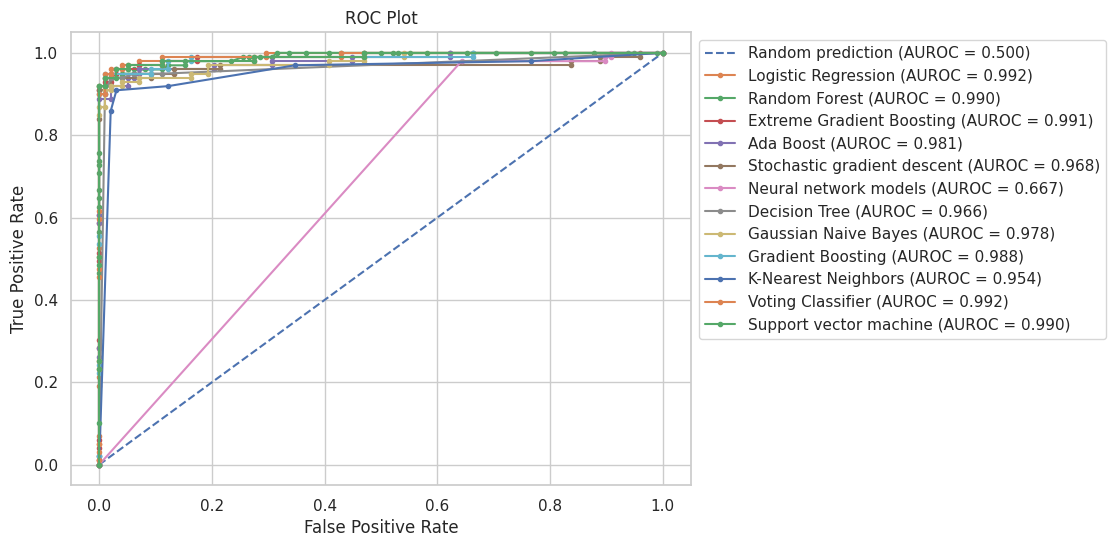

In [119]:
figure(figsize=(8, 6), dpi=100)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Extreme Gradient Boosting (AUROC = %0.3f)' % xgb_auc)
plt.plot(adaboost_fpr, adaboost_tpr, marker='.', label='Ada Boost (AUROC = %0.3f)' % adaboost_auc)
plt.plot(sgd_fpr, sgd_tpr, marker='.', label='Stochastic gradient descent (AUROC = %0.3f)' % sgd_auc)
plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural network models (AUROC = %0.3f)' % nn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes (AUROC = %0.3f)' % gnb_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(voting_fpr, voting_tpr, marker='.', label='Voting Classifier (AUROC = %0.3f)' % voting_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support vector machine (AUROC = %0.3f)' % svm_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(bbox_to_anchor=(1,1), loc="upper left") # 
# Show plot
plt.show()

###Precision Recall f1 score

In [120]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

In [121]:
x = np.arange(len(names))
width = 0.35

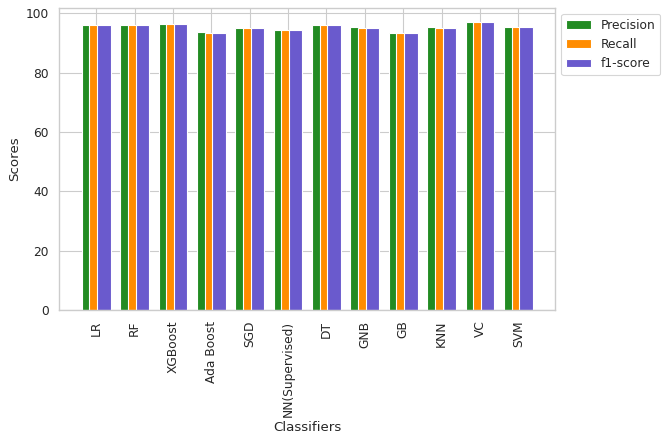

In [122]:
plt.figure(figsize=(8,5), dpi=80)
plt.bar(x-0.2, preci, width, color='forestgreen')
plt.bar(x, recall, width, color='darkorange')
plt.bar(x+0.2, f1, width, color='slateblue')
plt.xticks(x, names, rotation=90)
plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.legend(["Precision", "Recall", "f1-score"], bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [123]:
import pandas as pd
from zipfile import ZipFile as zip
res_df = pd.DataFrame(np.column_stack([names, scores, preci, recall, f1]), columns =['Classifier', 'Accuracy Score', 'Precision', 'Recall', 'F1-score'])

In [124]:
res_df

,Classifier,Accuracy Score,Precision,Recall,F1-score
0,LR,95.94,96.01,95.95,95.94
1,RF,95.94,96.01,95.95,95.94
2,XGBoost,96.45,96.48,96.45,96.45
3,Ada Boost,93.4,93.52,93.39,93.39
4,SGD,94.92,94.94,94.93,94.92
5,NN(Supervised),94.42,94.42,94.41,94.42
6,DT,95.94,96.01,95.95,95.94
7,GNB,94.92,95.21,94.94,94.92
8,GB,93.4,93.45,93.39,93.4
9,KNN,94.92,95.21,94.94,94.92
